<a href="https://colab.research.google.com/github/Ngoc99/lab8/blob/master/2_Lab_MLPClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Multilayer Perceptron trong Python

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
import numpy as np
from sklearn.neural_network import MLPClassifier

## 1) MLPClassifier for toy dataset 

### Chuẩn bị dữ liệu

In [2]:
# Create artificial dataset (classification problem within 2 classes within R^2 input space)
X, y = make_moons(n_samples=900, noise=0.2, random_state=0)

In [3]:
X = np.array(X)
y = np.array(y)

In [4]:
X.shape

(900, 2)

In [5]:
y.shape

(900,)

In [6]:
# Preprocess dataset, and split into training and test part
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [7]:
# Encode class labels as binary vector (with exactly ONE bit set to 1, and all others to 0)
Y_train_OneHot = np.eye(2)[y_train]
Y_test_OneHot = np.eye(2)[y_test]

In [8]:
X_train.shape

(270, 2)

In [9]:
y_train.shape

(270,)

In [10]:
# Plot training+testing dataset
################################
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

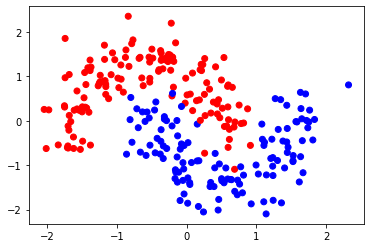

In [11]:
# Plot the training points...
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)

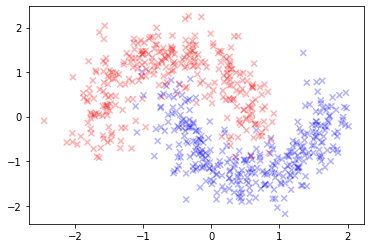

In [12]:
#   ...and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_test, cmap=cm_bright, alpha=0.3)


### Xây dựng model `MLPClassifier`

In [13]:


clf = MLPClassifier(hidden_layer_sizes=(1, ), activation='tanh', solver='sgd', 
                    alpha=0.0000001, batch_size=4, learning_rate='constant', learning_rate_init=0.005, 
                    power_t=0.5, max_iter=500, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.2, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(clf)

MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1,), learning_rate='constant',
              learning_rate_init=0.005, max_fun=15000, max_iter=500,
              momentum=0.8, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=11, shuffle=True, solver='sgd',
              tol=1e-05, validation_fraction=0.2, verbose=True,
              warm_start=False)


In [14]:

# Train the MLP classifier on training dataset
clf.fit(X_train, Y_train_OneHot)
print()


Iteration 1, loss = 1.61782867
Iteration 2, loss = 1.46336388
Iteration 3, loss = 1.38459334
Iteration 4, loss = 1.32321289
Iteration 5, loss = 1.24889455
Iteration 6, loss = 1.15548341
Iteration 7, loss = 1.04889855
Iteration 8, loss = 0.93978175
Iteration 9, loss = 0.84898173
Iteration 10, loss = 0.78414044
Iteration 11, loss = 0.74164191
Iteration 12, loss = 0.71740556
Iteration 13, loss = 0.70160787
Iteration 14, loss = 0.68982051
Iteration 15, loss = 0.68390074
Iteration 16, loss = 0.67881310
Iteration 17, loss = 0.67152207
Iteration 18, loss = 0.66713332
Iteration 19, loss = 0.66371361
Iteration 20, loss = 0.66030339
Iteration 21, loss = 0.65985340
Iteration 22, loss = 0.65673718
Iteration 23, loss = 0.65391946
Iteration 24, loss = 0.65118542
Iteration 25, loss = 0.64914781
Iteration 26, loss = 0.64807004
Iteration 27, loss = 0.64837625
Iteration 28, loss = 0.64626185
Iteration 29, loss = 0.64517167
Iteration 30, loss = 0.64714578
Iteration 31, loss = 0.64185647
Iteration 32, los

In [15]:

# Evaluate acuracy on test data
score = clf.score(X_test,Y_test_OneHot)
print("Acuracy (on test set) = ", score)

Acuracy (on test set) =  0.8666666666666667


### Sử dụng GridSearchCV để chọn bộ thông số tốt nhất 

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# param_grid = [
#   {'hidden_layer_sizes': [(5,), (10,), (15,), (25,)], 
#    'learning_rate_init':[0.003, 0.01, 0.03, 0.1],
#    'alpha': [0.00001, 0.0001, 0.001, 0.01]}
#  ]

param_grid = [
  {'hidden_layer_sizes': [(5,), (10,)], 
   'learning_rate_init':[0.003, 0.01],
   'alpha': [0.00001, 0.0001]}
 ]


clf = GridSearchCV( MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4, beta_1=0.9,
   beta_2=0.999, early_stopping=False, epsilon=1e-08,
   hidden_layer_sizes=(10,), learning_rate='constant',
   learning_rate_init=0.005, max_iter=500, momentum=0.8,
   nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
   solver='adam', tol=1e-05, validation_fraction=0.3, verbose=False,
   warm_start=False), 
   param_grid, cv=3, scoring='accuracy')



In [17]:
clf.fit(X_train, Y_train_OneHot)
print("Best parameters set found on development set:")



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters set found on development set:


In [18]:
print(clf.best_params_)


{'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.01}


In [19]:
clf.best_estimator_

MLPClassifier(activation='tanh', alpha=1e-05, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5,), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=500,
              momentum=0.8, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=11, shuffle=True, solver='adam',
              tol=1e-05, validation_fraction=0.3, verbose=False,
              warm_start=False)

In [20]:
clf.best_score_

0.9666666666666667

## 2) MLPClassifier cho bộ dữ liệu số

Number_of-examples =  1797

 Plot of first example
CLOSE PLOT WINDOW TO CONTINUE


<Figure size 432x288 with 0 Axes>

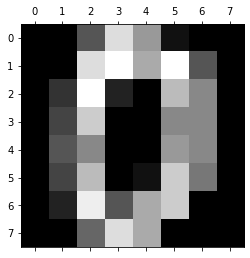

In [21]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

digits = load_digits()
n_samples = len(digits.images)
print("Number_of-examples = ", n_samples)

import matplotlib.pyplot as plt
print("\n Plot of first example")
plt.gray() 
plt.matshow(digits.images[0]) 
print("CLOSE PLOT WINDOW TO CONTINUE")
plt.ioff()

In [22]:

# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

X = data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train.shape

(1437, 64)

In [24]:
y_train.shape

(1437,)

In [25]:
clf = MLPClassifier(hidden_layer_sizes=(30, ), activation='tanh', solver='sgd', 
                    alpha=0.00001, batch_size=4, learning_rate='constant', learning_rate_init=0.01, 
                    power_t=0.5, max_iter=500, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=True, validation_fraction=0.1, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [26]:
clf

MLPClassifier(activation='tanh', alpha=1e-05, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(30,), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=500,
              momentum=0.8, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=11, shuffle=True, solver='sgd',
              tol=1e-05, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [27]:
# Train the MLP classifier on training dataset
clf.fit(X_train, y_train)


Iteration 1, loss = 1.22751675
Validation score: 0.680556
Iteration 2, loss = 0.69716883
Validation score: 0.770833
Iteration 3, loss = 0.56765860
Validation score: 0.833333
Iteration 4, loss = 0.42692461
Validation score: 0.854167
Iteration 5, loss = 0.44407381
Validation score: 0.847222
Iteration 6, loss = 0.47804205
Validation score: 0.840278
Iteration 7, loss = 0.42595794
Validation score: 0.854167
Iteration 8, loss = 0.30959920
Validation score: 0.854167
Iteration 9, loss = 0.39918731
Validation score: 0.819444
Iteration 10, loss = 0.48297805
Validation score: 0.798611
Iteration 11, loss = 0.36982993
Validation score: 0.819444
Iteration 12, loss = 0.43417134
Validation score: 0.819444
Iteration 13, loss = 0.42745073
Validation score: 0.881944
Iteration 14, loss = 0.37445410
Validation score: 0.861111
Iteration 15, loss = 0.25827553
Validation score: 0.909722
Iteration 16, loss = 0.35776376
Validation score: 0.847222
Iteration 17, loss = 0.34432047
Validation score: 0.875000
Iterat

MLPClassifier(activation='tanh', alpha=1e-05, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(30,), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=500,
              momentum=0.8, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=11, shuffle=True, solver='sgd',
              tol=1e-05, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [28]:

score = clf.score(X_train,y_train)
print("Acuracy (on train set) = ", score)

Acuracy (on train set) =  0.9491997216423104


In [29]:

score = clf.score(X_test,y_test)
print("Acuracy (on test set) = ", score)


Acuracy (on test set) =  0.9361111111111111


### Thay đổi số layers, số neurons trên mỗi layers:

In [30]:
clf = MLPClassifier(hidden_layer_sizes=(30, 20, 15 ), activation='tanh', solver='sgd', 
                    alpha=0.00001, batch_size=4, learning_rate='constant', learning_rate_init=0.01, 
                    power_t=0.5, max_iter=500, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=True, validation_fraction=0.1, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [31]:
# Train the MLP classifier on training dataset
clf.fit(X_train, y_train)


Iteration 1, loss = 1.39438684
Validation score: 0.583333
Iteration 2, loss = 0.98594770
Validation score: 0.798611
Iteration 3, loss = 0.84027360
Validation score: 0.659722
Iteration 4, loss = 1.05289540
Validation score: 0.597222
Iteration 5, loss = 1.13078141
Validation score: 0.590278
Iteration 6, loss = 1.17084743
Validation score: 0.409722
Iteration 7, loss = 1.01716487
Validation score: 0.618056
Iteration 8, loss = 0.97865100
Validation score: 0.701389
Iteration 9, loss = 1.02532295
Validation score: 0.631944
Iteration 10, loss = 1.06781421
Validation score: 0.500000
Iteration 11, loss = 0.96507121
Validation score: 0.729167
Iteration 12, loss = 0.75089241
Validation score: 0.791667
Iteration 13, loss = 0.82165641
Validation score: 0.638889
Validation score did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='tanh', alpha=1e-05, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(30, 20, 15), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=500,
              momentum=0.8, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=11, shuffle=True, solver='sgd',
              tol=1e-05, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [32]:

score = clf.score(X_train,y_train)
print("Acuracy (on train set) = ", score)

Acuracy (on train set) =  0.8190675017397355


In [33]:

score = clf.score(X_test,y_test)
print("Acuracy (on test set) = ", score)


Acuracy (on test set) =  0.8166666666666667


- Nhận xét: việc chọn số Layers và số neurons trên mỗi Layers phải dựa vào từng bài toán  để có thể đạt được độ chính xác cao nhất